In [1]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

# 4.1 The Default Tagger

In [4]:
import nltk
tags = [ tag for (word,tag) in brown.tagged_words(categories='news') ]
nltk.FreqDist(tags).max()

'NN'

In [9]:
from nltk import word_tokenize
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [10]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

# 4.2 The Regular Expression Tagger

In [11]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                     # nouns (default)
]

In [13]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [14]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

# 4.3 The Lookup Tagger

In [15]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [16]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [17]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

In [18]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

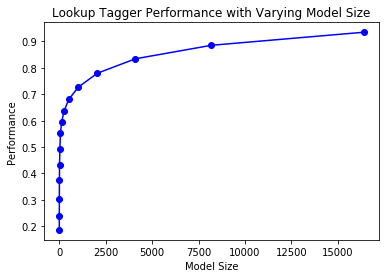

In [19]:
display()

In [21]:
import pylab
pylab.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [23]:
word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
words_by_freq = [w for (w, _) in word_freqs]
words_by_freq[:2]

['the', ',']

In [24]:
words_by_freq[:10]

['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'for', 'The']

# 4.4 Evaluation

gold standard